# TITANIC SURVIVAL PREDICTION
PassengerId-Passenger ID

Survived-Whether Survived or not: 0 = No, 1 = Yes

Pclass -Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd

Name-Name of the Passenger

Sex-Gender

Age-Age in Years

SibSp-No. of siblings / spouses aboard the Titanic

Parch-No. of parents / children aboard the Titanic

Ticket-Ticket number

Fare-Passenger fare

Embarked implies where the traveler mounted from. There are three possible values for Embark — Southampton, Cherbourg, and Queenstown

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


In [3]:
df = pd.read_csv("/Titanic-Dataset.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.shape

(891, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
#how many survived?
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [11]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Sex'>

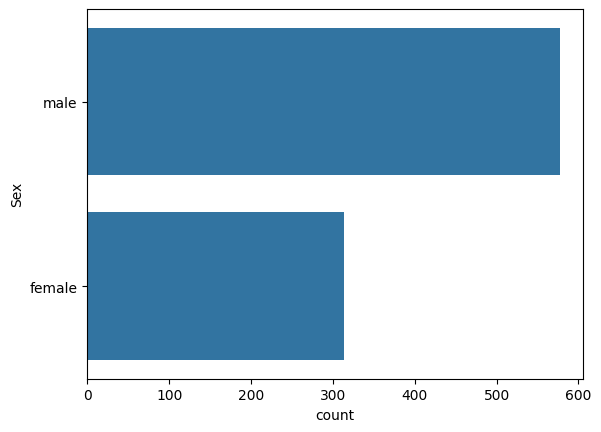

In [12]:
# count plot for "Sex" column
sns.countplot(df['Sex'])

In [13]:
gender_survival_counts = df.groupby(['Sex', 'Survived']).size().unstack()
gender_survival_counts

Survived,0,1
Sex,,
female,81,233
male,468,109


<Axes: xlabel='Sex', ylabel='count'>

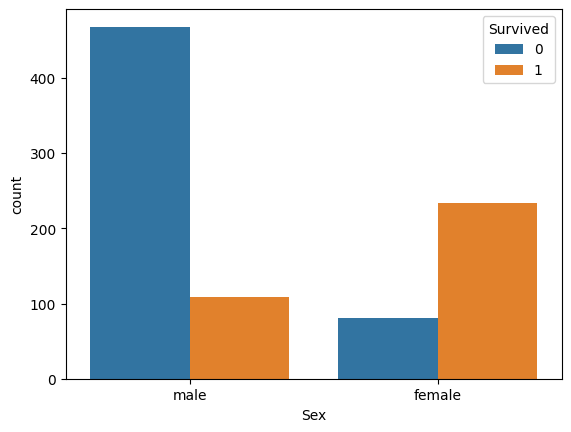

In [14]:
# Analysing Gender wise survivors
sns.countplot(x='Sex', hue='Survived', data=df)


<Axes: xlabel='Pclass', ylabel='count'>

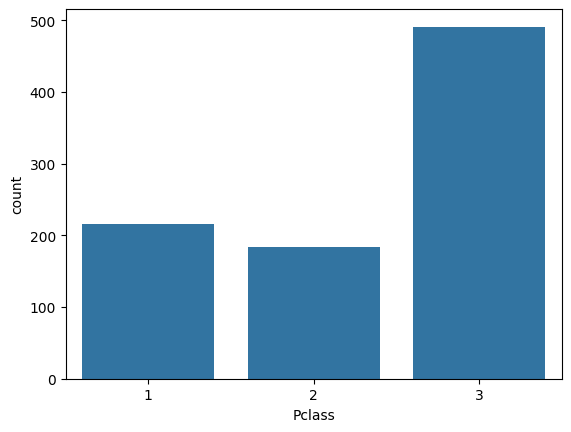

In [15]:
# count plot for "Pclass" column
sns.countplot(x='Pclass', data=df)

<Axes: xlabel='Pclass', ylabel='count'>

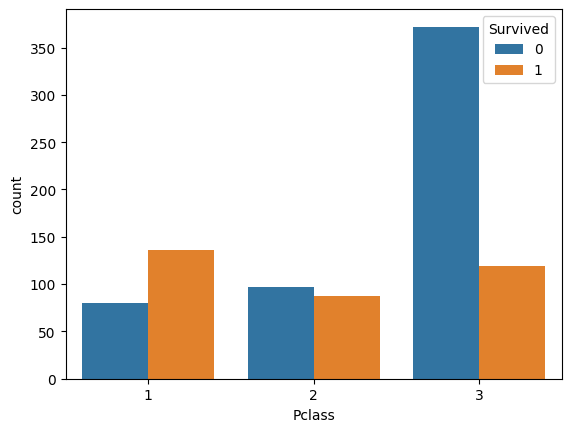

In [16]:
sns.countplot(x='Pclass', hue='Survived', data= df)

In [17]:
gender_survival_counts = df.groupby(['Pclass', 'Survived']).size().unstack()
gender_survival_counts

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


## Dealing with missing values

In [18]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Age

<Axes: xlabel='Age'>

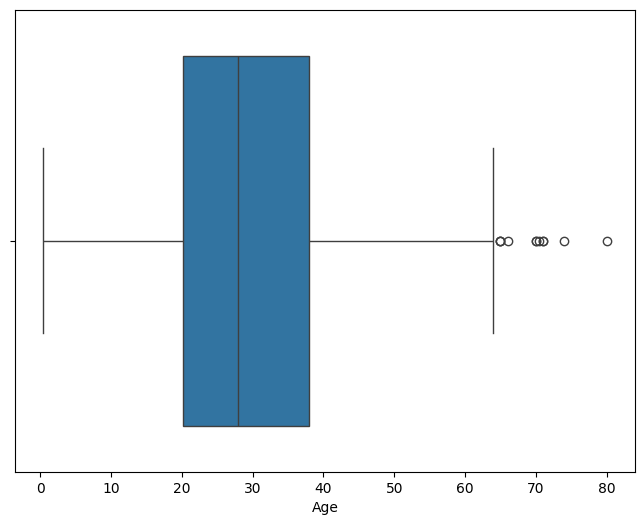

In [19]:
# Box Plot for 'Age'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])


In [20]:
int(df['Age'].median())

28

In [21]:
df['Age'] = df['Age'].fillna(np.nanmedian(df['Age']))
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Embarked

In [22]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [23]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [24]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.isnull().sum()

/tmp/ipykernel_4312/1025092037.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#### Cabin

In [25]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [26]:
df['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [27]:
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)
df.isnull().sum()

/tmp/ipykernel_4312/2164577729.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [28]:
int(df.duplicated().sum())

0

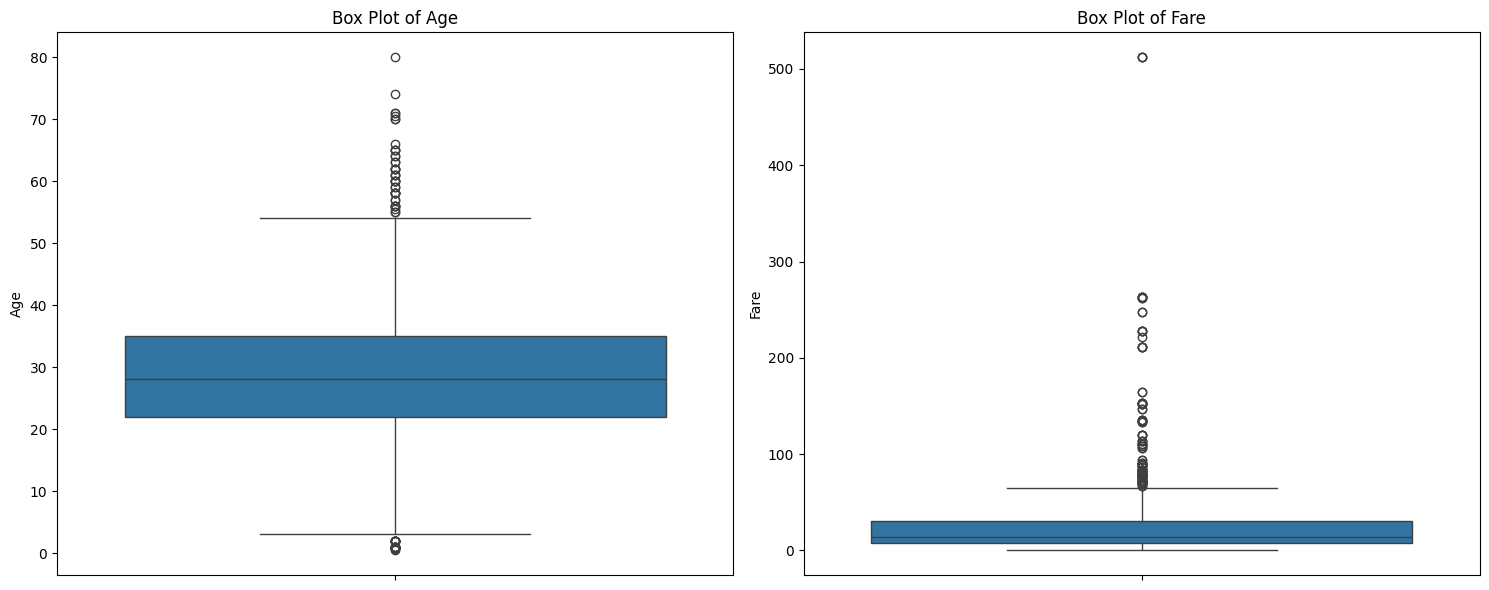

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) 
# Box Plot for 'Age'
sns.boxplot(ax=axes[0], y='Age', data=df)
axes[0].set_title('Box Plot of Age')

# Box Plot for 'Fare'
sns.boxplot(ax=axes[1], y='Fare', data=df)
axes[1].set_title('Box Plot of Fare')
plt.tight_layout()
plt.show()

In [30]:
# Define a function to remove outliers based on quantiles
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1                 
    lower_bound = Q1 - 0.2 * IQR
    upper_bound = Q3 + 0.2 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from relevant columns

df = remove_outliers(df, 'Age')
df = remove_outliers(df, 'Fare')


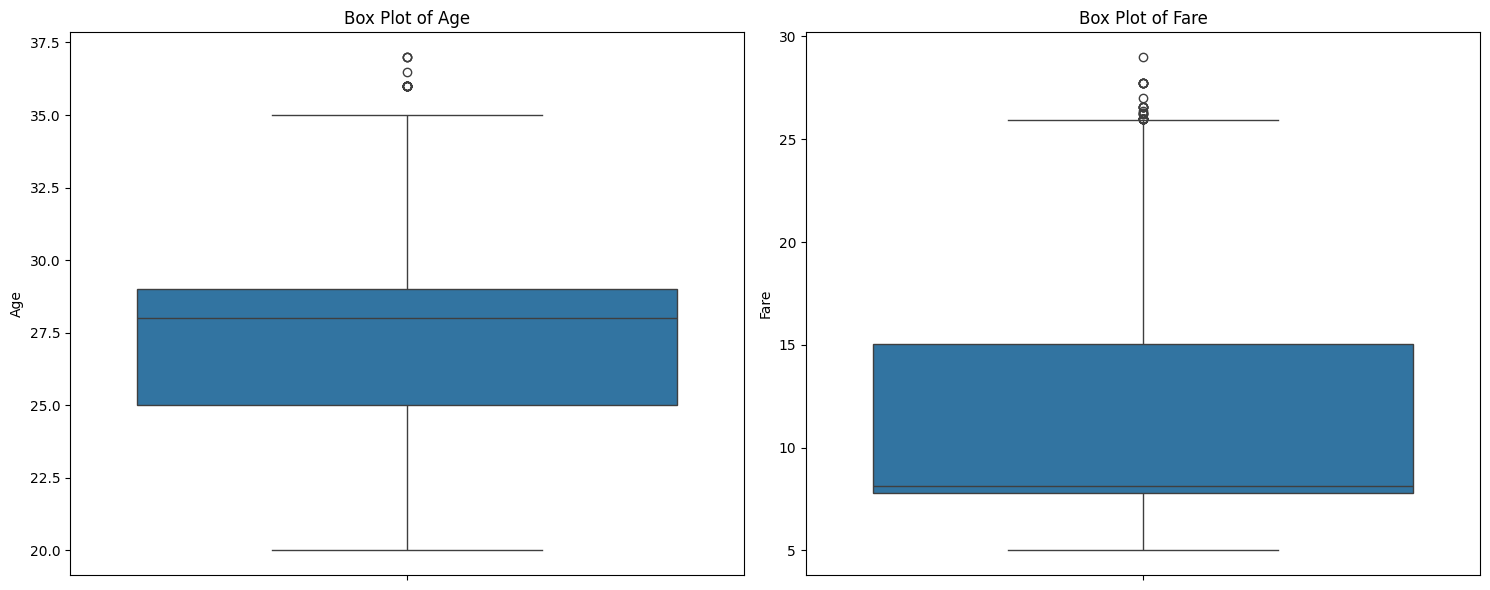

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # Adjust figsize for better aspect ratio

# Box Plot for 'Age'
sns.boxplot(ax=axes[0], y='Age', data=df)
axes[0].set_title('Box Plot of Age')

# Box Plot for 'Fare'
sns.boxplot(ax=axes[1], y='Fare', data=df)
axes[1].set_title('Box Plot of Fare')
plt.tight_layout()
plt.show()

### Convert categorical

In [32]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df['Ticket'] = label_encoder.fit_transform(df['Ticket'])
df['Cabin'] = label_encoder.fit_transform(df['Cabin'])
df["Name"] = label_encoder.fit_transform(df["Name"].values)

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,43,1,22.0,1,0,304,7.2500,2,2
2,3,1,3,136,0,26.0,0,0,381,7.9250,2,2
4,5,0,3,10,1,35.0,0,0,264,8.0500,2,2
5,6,0,3,247,1,28.0,0,0,122,8.4583,2,1
8,9,1,3,162,0,27.0,0,2,172,11.1333,2,2


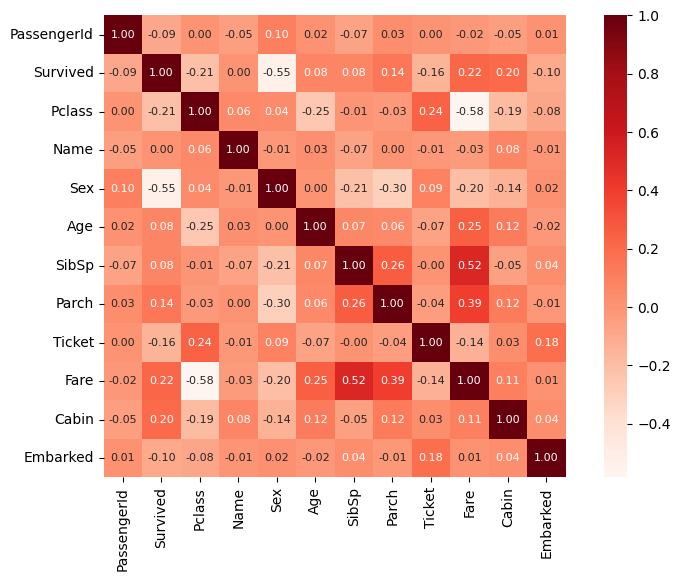

In [34]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,
    cbar=True,
    square=True,
    fmt='.2f', 
    annot=True,
    annot_kws={'size': 8},
    cmap='Reds'
)
plt.show()

### PREDICTION

In [35]:

X = df.drop(['Survived', 'Name','PassengerId','Ticket','Cabin'], axis=1)
y = df['Survived']
print(X.shape, y.shape)

(413, 7) (413,)


In [36]:

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
print(y.value_counts())
print(y_sm.value_counts())

Survived
0    294
1    119
Name: count, dtype: int64
Survived
0    294
1    294
Name: count, dtype: int64


In [37]:
#Create Training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=999)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Convert the scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


(289, 7) (124, 7) (289,) (124,)


In [38]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'decsion tree' : DecisionTreeClassifier(max_depth=5)
}

In [39]:
evaluation_results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}
# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    evaluation_results['Model'].append(model_name)
    evaluation_results['Accuracy'].append(accuracy)
    evaluation_results['Precision'].append(precision)
    evaluation_results['Recall'].append(recall)
    evaluation_results['F1-Score'].append(f1)
    print(f'{model_name} Accuracy: {accuracy:.4f}')
# Create a DataFrame to display the results
results_df = pd.DataFrame(evaluation_results)

# Print the results table
print("\nModel Evaluation Metrics Comparison:")
print(results_df)


Logistic Regression Accuracy: 0.7984
K-Nearest Neighbors Accuracy: 0.8387
Naive Bayes Accuracy: 0.7661
Support Vector Machine Accuracy: 0.8145
Random Forest Accuracy: 0.8226
decsion tree Accuracy: 0.7661

Model Evaluation Metrics Comparison:
                    Model  Accuracy  Precision  Recall  F1-Score
0     Logistic Regression  0.798387   0.714286   0.625  0.666667
1     K-Nearest Neighbors  0.838710   0.812500   0.650  0.722222
2             Naive Bayes  0.766129   0.666667   0.550  0.602740
3  Support Vector Machine  0.814516   0.757576   0.625  0.684932
4           Random Forest  0.822581   0.781250   0.625  0.694444
5            decsion tree  0.766129   0.866667   0.325  0.472727


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = KNeighborsClassifier()

model.fit(X_train_scaled, y_train)

# Example input data: [Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]
input_data = np.array([3, 1, 22.0, 1, 0, 7.25, 2]).reshape(1, -1)
input_data_scaled = scaler.transform(input_data)

prediction = model.predict(input_data_scaled)
prediction_proba = model.predict_proba(input_data_scaled)

print(f'Survival Prediction: {"Survived" if prediction[0] == 1 else "Not Survived"}')

Survival Prediction: Not Survived


/home/anjana/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [41]:
csv_file_path = ("/home/anjana/Project/Titanic_CaseStudy/Titanic-Dataset1.csv")
df.to_csv(csv_file_path, index=False)

In [42]:
import joblib
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# After training your model, save both the model and the scaler
joblib.dump(model, 'prediction.pkl')


['prediction.pkl']

In [43]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']